# Business Understanding


This Los Angelas crime dataset was supplied by LA County. It uses uniform crime reporting (UCR) created by the FBI to summarize incident info in a repeatable and comparable way to other cities, counties, and states. The LA City Mayor wrote that the purpose of the data was for transparency's sake as well as encouraging those outside of the government to be able to use the data for the sake of innovation.
[Ref: https://data.lacity.org/]

* Add what our determined response is and follow formatting from class



We are sharing city data with the public to increase transparency, accountability and customer service and to empower companies, individuals and non-profit organizations with the ability to harness a vast array of useful information to improve life in our city. I hope that this data will help drive innovation and problem solving within the public and private sectors and that Angelenos will use it to more deeply understand and engage with their city. I encourage you to explore data.lacity.org to conduct research, develop apps or simply to poke around.
[Ref: https://data.lacity.org/]

(WHAT VARIABLE WE CARE ABOUT)

In [3]:
import pandas as pd

In [51]:

import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

%matplotlib inline
df = pd.read_csv("Data/Crime_Data_from_2010_to_2019.csv") 

# [10 points] Describe the meaning and type of data (scale, values, etc.) for each attribute in the data file.

The table below describes the meaning and data type for each attribute in the data file.

*[Ref: Information displayed below is sourced from [LOS ANGELES OPEN DATA](https://data.lacity.org/A-Safe-City/Crime-Data-from-2010-to-2019/63jg-8b9z).]*

In [4]:
data_desc = pd.read_csv('data/Data_Description.csv')

from IPython.display import display, HTML

display(HTML(data_desc.to_html()))

,Column_Name,Description,Data_Type
0,DR_NO,"Division of Records Number: Official file number made up of a 2 digit year, area ID, and 5 digits",Plain Text
1,Date Rptd,MM/DD/YYYY,Date & Time
2,DATE OCC,MM/DD/YYYY,Date & Time
3,TIME OCC,In 24 hour military time.,Plain Text
4,AREA,The LAPD has 21 Community Police Stations referred to as Geographic Areas within the department. These Geographic Areas are sequentially numbered from 1-21.,Plain Text
5,AREA NAME,"The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles.",Plain Text
6,Rpt Dist No,"A four-digit code that represents a sub-area within a Geographic Area. All crime records reference the ""RD"" that it occurred in for statistical comparisons. Find LAPD Reporting Districts on the LA City GeoHub at http://geohub.lacity.org/datasets/c4f83909b81d4786aa8ba8a74a4b4db1_4",Plain Text
7,Part 1-2,-,Number
8,Crm Cd,Indicates the crime committed. (Same as Crime Code 1),Plain Text
9,Crm Cd Desc,Defines the Crime Code provided.,Plain Text


# Data Meaning Type

In [52]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115333 entries, 0 to 2115332
Data columns (total 28 columns):
 #   Column          Dtype  
---  ------          -----  
 0   DR_NO           int64  
 1   Date Rptd       object 
 2   DATE OCC        object 
 3   TIME OCC        int64  
 4   AREA            int64  
 5   AREA NAME       object 
 6   Rpt Dist No     int64  
 7   Part 1-2        int64  
 8   Crm Cd          int64  
 9   Crm Cd Desc     object 
 10  Mocodes         object 
 11  Vict Age        int64  
 12  Vict Sex        object 
 13  Vict Descent    object 
 14  Premis Cd       float64
 15  Premis Desc     object 
 16  Weapon Used Cd  float64
 17  Weapon Desc     object 
 18  Status          object 
 19  Status Desc     object 
 20  Crm Cd 1        float64
 21  Crm Cd 2        float64
 22  Crm Cd 3        float64
 23  Crm Cd 4        float64
 24  LOCATION        object 
 25  Cross Street    object 
 26  LAT             float64
 27  LON             float64
dtypes: float64(8

# Data Quality

There are 898 crimes without a location noted

In [53]:
emptyLATLON =  sum(df['LON']==0)
emptyLATLON

898

To better plot, we could setting these to mean points.

In [34]:


#34.06377 	-118.3088

NameError: name 'gdp' is not defined

# Simple Statistics

In [54]:
df.describe()

,DR_NO,TIME OCC,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Weapon Used Cd,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LAT,LON
count,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115333e+06,2.115280e+06,710470.000000,2.115323e+06,139402.000000,3499.000000,104.000000,2.115333e+06,2.115333e+06
mean,1.479209e+08,1.359865e+03,1.108682e+01,1.155070e+03,1.446029e+00,5.073349e+02,3.176409e+01,3.111814e+02,371.371934,5.071590e+02,949.996428,972.210346,975.105769,3.406377e+01,-1.183088e+02
std,2.887068e+07,6.470967e+02,6.012440e+00,6.012589e+02,4.970787e-01,2.106272e+02,2.064750e+01,2.113121e+02,113.469024,2.104900e+02,125.680743,85.516627,81.276338,7.115120e-01,2.440446e+00
min,1.208575e+06,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00,1.100000e+02,-9.000000e+00,1.010000e+02,101.000000,1.100000e+02,210.000000,93.000000,421.000000,0.000000e+00,-1.188279e+02
25%,1.214242e+08,9.300000e+02,6.000000e+00,6.430000e+02,1.000000e+00,3.300000e+02,2.000000e+01,1.020000e+02,400.000000,3.300000e+02,998.000000,998.000000,998.000000,3.401050e+01,-1.184364e+02
50%,1.508087e+08,1.430000e+03,1.100000e+01,1.189000e+03,1.000000e+00,4.420000e+02,3.200000e+01,2.100000e+02,400.000000,4.420000e+02,998.000000,998.000000,998.000000,3.406230e+01,-1.183295e+02
75%,1.715119e+08,1.900000e+03,1.600000e+01,1.668000e+03,2.000000e+00,6.260000e+02,4.600000e+01,5.010000e+02,400.000000,6.260000e+02,998.000000,998.000000,998.000000,3.417580e+01,-1.182778e+02
max,9.102204e+08,2.359000e+03,2.100000e+01,2.199000e+03,2.000000e+00,9.560000e+02,1.180000e+02,9.710000e+02,516.000000,9.990000e+02,999.000000,999.000000,999.000000,3.479070e+01,0.000000e+00


 Victim Age appears to be highest in the twenties and goes down from there.
 0 - may be no age given check for NaN

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15000ca90>]],
      dtype=object)

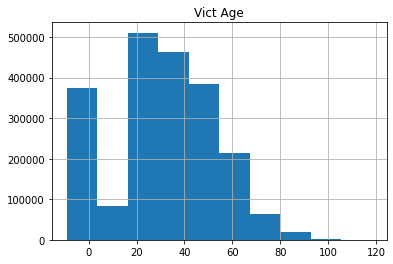

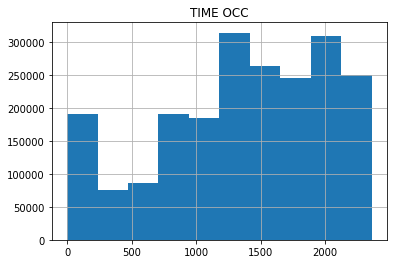

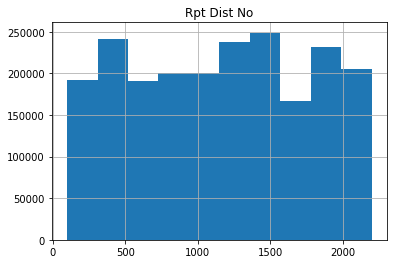

In [55]:
df.hist(column='Vict Age')
df.hist(column='TIME OCC')
df.hist(column='Rpt Dist No')


# Visualize Attributes

https://towardsdatascience.com/geopandas-101-plot-any-data-with-a-latitude-and-longitude-on-a-map-98e01944b972

This is using 

In [77]:
#!/usr/bin/env python

# make sure to install these packages before running:
# pip install pandas
# pip install sodapy

import pandas as pd
from sodapy import Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.lacity.org", None)

# Example authenticated client (needed for non-public datasets):
# client = Socrata(data.lacity.org,
#                  MyAppToken,
#                  userame="user@example.com",
#                  password="AFakePassword")

# First 2000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("63jg-8b9z", limit=5000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)
results_df.head()

results_df['lat'] = results_df['lat'].astype(float)
results_df['lon'] = results_df['lon'].astype(float)

#results_df.lat = int(results_df.lat)
#results_df.lat = int(results_df.lon)

In [78]:

#create a geopandas dataframe and convert lat/long to point geometry:
geometry = [Point(xy) for xy in zip(results_df["lon"], results_df["lat"])]
geometry[:3]

In [79]:
#Tell it that we are using Lat/Long as our
crs = {'init': 'epsg:4326'}

geo_df = gpd.GeoDataFrame(results_df, crs = crs, geometry = geometry)
geo_df.head()

,dr_no,date_rptd,date_occ,time_occ,area,area_name,rpt_dist_no,part_1_2,crm_cd,crm_cd_desc,...,crm_cd_1,location,lat,lon,cross_street,weapon_used_cd,weapon_desc,crm_cd_2,crm_cd_3,geometry
0,001307355,2010-02-20T00:00:00.000,2010-02-20T00:00:00.000,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,900,300 E GAGE AV,33.9825,-118.2695,NaN,NaN,NaN,NaN,NaN,POINT (-118.26950 33.98250)
1,011401303,2010-09-13T00:00:00.000,2010-09-12T00:00:00.000,0045,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,740,SEPULVEDA BL,33.9599,-118.3962,MANCHESTER AV,NaN,NaN,NaN,NaN,POINT (-118.39620 33.95990)
2,070309629,2010-08-09T00:00:00.000,2010-08-09T00:00:00.000,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,946,1300 E 21ST ST,34.0224,-118.2524,NaN,NaN,NaN,NaN,NaN,POINT (-118.25240 34.02240)
3,090631215,2010-01-05T00:00:00.000,2010-01-05T00:00:00.000,0150,06,Hollywood,0646,2,900,VIOLATION OF COURT ORDER,...,900,CAHUENGA BL,34.1016,-118.3295,HOLLYWOOD BL,102,HAND GUN,998,NaN,POINT (-118.32950 34.10160)
4,100100501,2010-01-03T00:00:00.000,2010-01-02T00:00:00.000,2100,01,Central,0176,1,122,"RAPE, ATTEMPTED",...,122,8TH ST,34.0387,-118.2488,SAN PEDRO ST,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",NaN,NaN,POINT (-118.24880 34.03870)


In [67]:
#This was just to limit data
#geo_400 = geo_df[geo_df['TIME OCC'] == 400].describe()
#geo_400 = geo_400[geo_df['LAT'] != 0].describe()

/Users/juliacodes/Documents/GitHub/MSDS-ML1-VisualizationAndDataProcessing/Julia/lacrime-env/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

Shape data from LA City Geo data
https://geohub.lacity.org/datasets/7835077624374b9fa65676443ba7a578_19

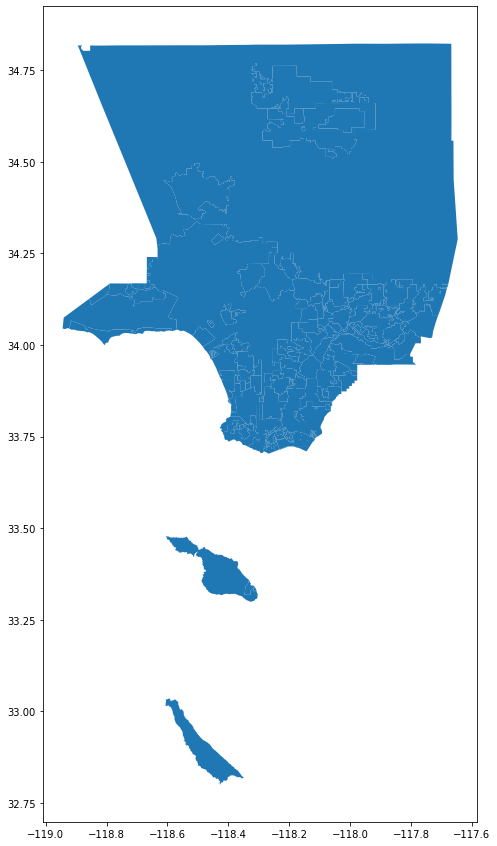

In [43]:
la_map = gpd.read_file('Data/shape/City_Boundaries.shp')
fig,ax = plt.subplots(figsize=(15,15))
la_map.plot(ax=ax)

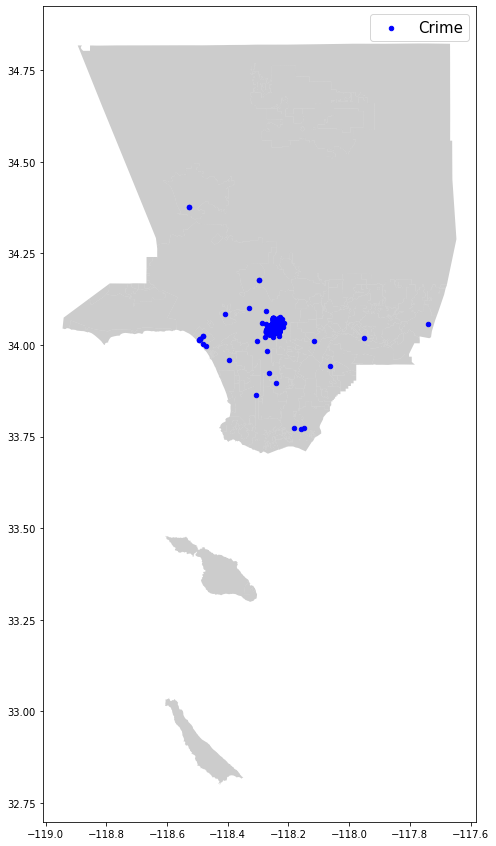

In [80]:
fig,ax = plt.subplots(figsize = (15,15))
la_map.plot(ax= ax, alpha = 0.4, color = "grey")
geo_df['Victim_sex'].plot(ax = ax, markersize = 20, color = "blue", marker = 'o', label = 'Crime')
plt.legend(prop={'size':15})

# Explore Joint Attributes
Ideas
* (Age, Area)
* (Age, Crime Code)
* (Age, Gender)

TypeError: 'int' object is not iterable

# Explore Attributes and Class

So far interesting vars
* Victim Age
* LAT/Lon
* Area

# New Features
Ages bucketed
* Pre-school
* School-Age
* Early Twenties
* Late Twenties
* Thirties
* Fourties
* Fifties

Time to Report
* Time reported - Time Occurred

Mocodes
* Finding the most prevalent codes among the lists and dummy coding 

Weapon Noted
* Weapon Used - Not Reported

Number of Charges
* Crime code 1-4 Not null count

Reported as a Block
* Yes if Cross-street is null/blank

Time occurrence in relation to time of year
* Sunrise
* Day
* Sunset
* Evening

Parsed Date Data
* Month
* Year
* Day of Week